In [11]:
import yaml as y
workflowSubject1 = open("hello.cwl", 'rb')
out_workflow = y.safe_load(workflowSubject1)
print (out_workflow)

{'cwlVersion': 'v1.0', 'class': 'Workflow', 'label': 'Hello World', 'doc': 'Outputs a message using echo', 'inputs': [], 'outputs': {'response': {'outputSource': 'step0/response', 'type': 'File'}}, 'steps': {'step0': {'run': {'class': 'CommandLineTool', 'inputs': {'message': {'type': 'string', 'doc': 'The message to print', 'default': 'Hello World', 'inputBinding': {'position': 0}}}, 'baseCommand': 'echo', 'stdout': 'response.txt', 'outputs': {'response': {'type': 'stdout'}}}, 'in': [], 'out': ['response']}}}


/varscan/varscan.cwl INPUTS:
INPUT Name: reference Type: File Source: WORKFLOW
INPUT Name: tumor_bam Type: File Source: WORKFLOW
INPUT Name: normal_bam Type: File Source: WORKFLOW
INPUT Name: roi_bed Type: File? Source: WORKFLOW

/varscan/varscan.cwl OUTPUTS:
OUTPUT Name: snvs Type: File
OUTPUT Name: indels Type: File
OUTPUT Name: somatic_hc_snvs Type: File
OUTPUT Name: somatic_snvs Type: File
OUTPUT Name: germline_hc_snvs Type: File
OUTPUT Name: germline_snvs Type: File
OUTPUT Name: loh_hc_snvs Type: File
OUTPUT Name: loh_snvs Type: File
OUTPUT Name: somatic_hc_indels Type: File
OUTPUT Name: somatic_indels Type: File
OUTPUT Name: germline_hc_indels Type: File
OUTPUT Name: germline_indels Type: File
OUTPUT Name: loh_hc_indels Type: File
OUTPUT Name: loh_indels Type: File

------------------------------------------------
/varscan/varscan.cwl STEPS
-------------------------------------------------
STEP Name: somatic
-----------------------------------------------
somatic INPUTS:
INPUT Na

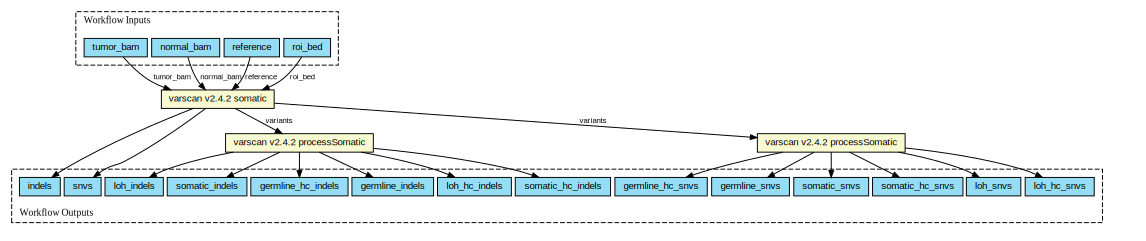

In [3]:
import cwlBrowser as c
import workflow as wf
#compilee = c.load("lobSTR.cwl")
#compilee.printSteps()
compilee2 = c.load("https://github.com/hamid58b/cancer-genomics-workflow/blob/master/varscan/varscan.cwl", link=True)
compilee2.printInputs()
compilee2.printOutputs()
compilee2.printSteps()
c.displayGraphSVG("https://github.com/hamid58b/cancer-genomics-workflow/blob/master/varscan/varscan.cwl")

In [7]:
from IPython.display import HTML, display

data = [["Name", "Type",],
        ["crisp","File",],
        ["bacon", "string",],
        ]

display(HTML(
   '<table><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in data)
       )
))

Name,Type
crisp,File
bacon,string


In [1]:
import requests
import base64
import yaml

link = "https://api.github.com/repos/seanleken/workflowtest/contents/workflows/arithmeticfunction.cwl"
req = requests.get(link)
if req.status_code != 200:
    print(req.status_code)
    if req.status_code == 404:
        print ("cwl file not found. Maybe due to incorrect url")
        print("\n")
else:
    req = req.json()  	    
    content = base64.b64decode(req['content'])
    content = content.decode("utf-8")
    try:
        workflow = yaml.safe_load(content)
        print (workflow)
    except (yaml.YAMLError) as yamlError:
        print ("Error in loading the cwl file")
        print (yamlError)

{'cwlVersion': 'v1.0', 'class': 'Workflow', 'doc': 'Adds two numbers then subtracts sum by another number', 'inputs': {'operand1': {'type': 'string', 'default': '12'}, 'operand2': {'type': 'string', 'default': '7'}, 'operand3': {'type': 'string', 'default': '2'}}, 'outputs': {'result': {'outputSource': 'subtract/difference', 'type': 'File'}}, 'steps': {'add': {'run': 'add.cwl', 'in': {'addition_op1': 'operand1', 'addition_op2': 'operand2'}, 'out': ['sum']}, 'subtract': {'run': 'subtract.cwl', 'in': {'subtract_op1': 'add/sum', 'subtract_op2': 'operand3'}, 'out': ['difference']}}}


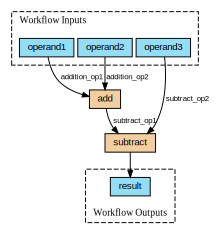

------------------------------------------------
workflows/arithmeticfunction1.cwl STEPS
-------------------------------------------------
STEP Name: add
-----------------------------------------------
add INPUTS:
INPUT Name: addition_op1 Source: WORKFLOW
INPUT Name: addition_op2 Source: WORKFLOW

add OUTPUTS:
OUTPUT Name: sum


-------------------------------------------------
STEP Name: subtract
-----------------------------------------------
subtract INPUTS:
INPUT Name: subtract_op1 Source: add
INPUT Name: subtract_op2 Source: WORKFLOW

subtract OUTPUTS:
OUTPUT Name: difference


-------------------------------------------------


In [8]:
import cwlBrowser as c

link = "https://github.com/seanleken/workflowtest/blob/master/workflows/arithmeticfunction1.cwl"
arith = c.load(link, True)
c.displayGraphSVG(link)
arith.printSteps()
